### Практическая работа к уроку № 7

In [1]:
import numpy as np

from sklearn import model_selection
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1
)

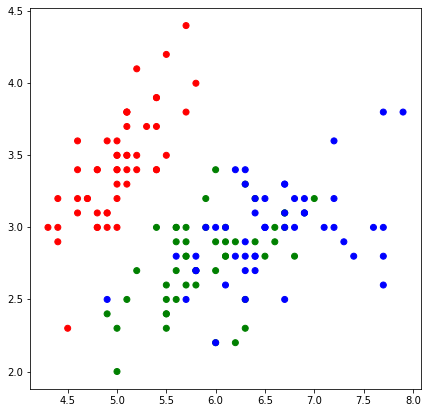

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
# Евклидова метрика
def e_metrics(x1, x2):

    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [6]:
def get_graph(model, name, plt_ax):
    X_train = model.x_train
    y_train = model.y_train
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt_ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt_ax.set(
        xlim = [xx.min(), xx.max()],
        ylim = [yy.min(), yy.max()],
        title = f"{name}\nТочность: {model.accuracy}",
        xticks=[],
        yticks=[]
    )
    plt_ax.grid(False)

In [7]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    def save_accuracy(self, y_pred, y_test):
        self.accuracy = round(accuracy(y_pred, y_test), 3)
    def predict(self, x_test):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.x_train)):
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = e_metrics(x, self.x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
            for d in sorted(test_distances)[0:self.k]:
                classes[d[1]] += 1

            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        
        return answers

In [8]:
knn_classic = KNN(k=5)
knn_classic.fit(X_train, y_train)
y_pred = knn_classic.predict(X_test)
knn_classic.save_accuracy(y_pred, y_test)

#### К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [9]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    def save_accuracy(self, y_pred, y_test):
        self.accuracy = round(accuracy(y_pred, y_test), 3)
    def predict(self, x_test):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.x_train)):
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = e_metrics(x, self.x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            # Сортируем список по расстоянию и переходим к нумерации по соседям.
            # Веса соседей будем формировать по закону
            # w = q^i, где
            # q = 0.75
            # i - номер соседа
            # среди первых k элементов подсчитаем взвешанную частоту появления разных классов
            for i, d in enumerate(sorted(test_distances)[0:self.k]):
                classes[d[1]] += 0.75 ** i

            # Записываем в список ответов класс с самым большим весом
            answers.append(sorted(classes, key=classes.get)[-1])
        
        return answers

In [10]:
knn_wts_num = KNN(k=5)
knn_wts_num.fit(X_train, y_train)
y_pred = knn_wts_num.predict(X_test)
knn_wts_num.save_accuracy(y_pred, y_test)

#### 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [11]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
    def save_accuracy(self, y_pred, y_test):
        self.accuracy = round(accuracy(y_pred, y_test), 3)
    def predict(self, x_test):
        answers = []
        for x in x_test:
            test_distances = []

            for i in range(len(self.x_train)):
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = e_metrics(x, self.x_train[i])

                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y_train[i]))

            # создаем словарь со всеми возможными классами
            classes = {class_item: 0 for class_item in set(self.y_train)}

            # Сортируем список по расстоянию и вычисляем вес соседа
            # в зависимости от расстояния по закону
            # w = q^d, где
            # q = 0.75
            # d - расстояние
            # среди первых k элементов подсчитаем взвешанную частоту появления разных классов
            for d in sorted(test_distances)[0:self.k]:
                classes[d[1]] += 0.75 ** d[0]

            # Записываем в список ответов класс с самым большим весом
            answers.append(sorted(classes, key=classes.get)[-1])
        
        return answers

In [12]:
knn_wts_dist = KNN(k=5)
knn_wts_dist.fit(X_train, y_train)
y_pred = knn_wts_dist.predict(X_test)
knn_wts_dist.save_accuracy(y_pred, y_test)

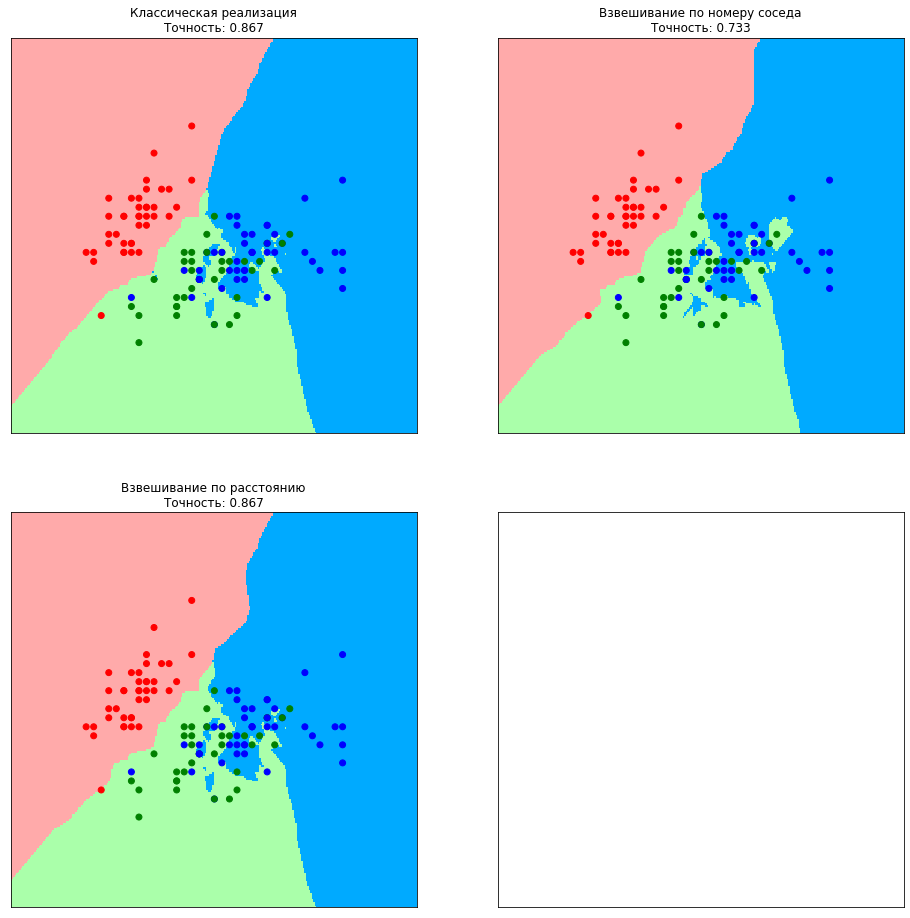

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(16, 16), \
                        sharey=True, sharex=True)

models = [knn_classic, knn_wts_num, knn_wts_dist]
titles = [
    "Классическая реализация",
    "Взвешивание по номеру соседа",
    "Взвешивание по расстоянию"
]

for i, fig_x in enumerate(ax.flatten()[:3]):
    get_graph(models[i], titles[i], fig_x)

Взвешивание с помощью номера соседа показало более плохой результат. Можем наблюдать на плоскости определенные выбросы, свидетельствующие о переобучении

Взвешивание с помощью расстояния и обычное голосование по количеству соседей показали примерно одинаковые результаты. Если присмотреться, то плоскости получились разные. Но плоскость при обычном голосовании получилась с более плавными границами, что является хорошим показателем.